# COVID-19 una pandemia Mundial.
![alt text](https://joslin-prod.s3.amazonaws.com/www.joslin.org/assets/styles/article_hero_standard/s3/2020-04/coronavirusfaq.jpg?h=9f5479df&itok=diSUB2s4)


# 	Seleccionar y cargar un dataset

In [1]:
# Descripcion del DataSet "2.COVID19_clasificacion" El punto principal de este proyecto es analizar
# y poder tener un entendimiento de la situacion actual por la cual pasa el pais y poder buscar las variables 
# mas correlacionadas al virus y la magnitud.

#Importacion de librerias.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
print('Librerias Importadas')

dataset = pd.read_csv('/content/2.COVID19_clasificacion.csv')  
print(dataset.shape[1]) 
dataset.head()


Librerias Importadas
18


,Number,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision_label
0,1,80,Male,Yes,Yes,Yes,*,*,*,*,*,*,*,*,*,*,*,COVID-19
1,2,62,Male,Yes,*,Yes,Yes,97,0.75,Yes,*,*,*,*,*,*,*,COVID-19
2,3,57,Male,Yes,*,Yes,Yes,*,*,*,*,Yes,*,*,*,*,*,COVID-19
3,4,45,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
4,5,63,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19


#  Procesamiento de Datos y estandarizacion.

In [2]:
Age=dataset['Age'].replace(['*', ], '0')
Gender=dataset['Gender'].replace(['*', ], 'Undefined')
Fever=dataset['Fever'].replace(['*', ], '')
Dyspnea=dataset['Dyspnea'].replace(['*', ], '0')
Cough=dataset['Cough'].replace(['*', ], '0')
PO2=dataset['PO2'].replace(['*', ], '0')
CRP=dataset['CRP'].replace(['*', ], '0')
Leukopenia=dataset['Leukopenia'].replace(['*', ], '0')
ExposuretoCovid19patients=dataset['Exposure to Covid-19 patients'].replace(['*', ], '0')
Highriskzone=dataset['High risk zone'].replace(['*', ], '0')
Temp=dataset['Temp'].replace(['*', ], '0')
BloodTest=dataset['Blood Test'].replace(['*', ], '0')
RTPCR=dataset['RT-PCR'].replace(['*', ], '0')
History=dataset['History'].replace(['*', ], '0')
Decision_label=dataset['Decision_label']

In [3]:
# Se crea un nuevo DataFrame con el cual agregaremos cada una de las variables 
# reemplazdas
dataF=pd.concat([Age,Gender,Fever,Dyspnea,Cough,PO2,CRP,Leukopenia,ExposuretoCovid19patients,Highriskzone
,Temp,BloodTest,RTPCR,History,Decision_label], axis=1)
print(dataF)

    Age  Gender Fever Dyspnea  ... Blood Test RT-PCR History Decision_label
0    80    Male   Yes     Yes  ...          0      0       0       COVID-19
1    62    Male   Yes       0  ...          0      0       0       COVID-19
2    57    Male   Yes       0  ...          0      0       0       COVID-19
3    45    Male   Yes       0  ...          0      0       0       COVID-19
4    63    Male   Yes       0  ...          0      0       0       COVID-19
..   ..     ...   ...     ...  ...        ...    ...     ...            ...
125  62  Female    No       0  ...          0      0       0            Flu
126  63    Male   Yes       0  ...          0      0       0            Flu
127  63  Female   Yes       0  ...          0      0       0            Flu
128  40  Female    No       0  ...          0      0       0            Flu
129  78  Female    No       0  ...          0      0       0            Flu

[130 rows x 15 columns]


In [4]:
# Limpieza de ruido el cual nos permite eliminar caracteres en las varibles 
# influyentes

print('Limpiando Ruido:')
dataF = dataF.dropna(subset=dataF.columns)
dataF

Limpiando Ruido:


,Age,Gender,Fever,Dyspnea,Cough,PO2,CRP,Leukopenia,Exposure to Covid-19 patients,High risk zone,Temp,Blood Test,RT-PCR,History,Decision_label
0,80,Male,Yes,Yes,0,0,0,0,0,0,0,0,0,0,COVID-19
1,62,Male,Yes,0,Yes,97,0.75,0,0,0,0,0,0,0,COVID-19
2,57,Male,Yes,0,Yes,0,0,0,Yes,0,0,0,0,0,COVID-19
3,45,Male,Yes,0,Yes,0,0,Yes,Yes,0,0,0,0,0,COVID-19
4,63,Male,Yes,0,Yes,0,0,Yes,Yes,0,0,0,0,0,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,62,Female,No,0,Yes,0,0,0,No,Yes,38.3,0,0,0,Flu
126,63,Male,Yes,0,Yes,0,0,0,No,Yes,38.5,0,0,0,Flu
127,63,Female,Yes,0,Yes,0,0,0,No,Yes,39.3,0,0,0,Flu
128,40,Female,No,0,No,0,0,0,No,Yes,0,0,0,0,Flu


In [5]:
#pasar la variable de salida categoricas a numericas
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
encoder=LabelEncoder()
#Utilizamos Encoder se utiliza si se va a convertir a numeros e importa el orden
dataF['Decision_label']=encoder.fit_transform(dataF.Decision_label.values)
print(dataF)  

    Age  Gender Fever Dyspnea  ... Blood Test RT-PCR History Decision_label
0    80    Male   Yes     Yes  ...          0      0       0              0
1    62    Male   Yes       0  ...          0      0       0              0
2    57    Male   Yes       0  ...          0      0       0              0
3    45    Male   Yes       0  ...          0      0       0              0
4    63    Male   Yes       0  ...          0      0       0              0
..   ..     ...   ...     ...  ...        ...    ...     ...            ...
125  62  Female    No       0  ...          0      0       0              1
126  63    Male   Yes       0  ...          0      0       0              1
127  63  Female   Yes       0  ...          0      0       0              1
128  40  Female    No       0  ...          0      0       0              1
129  78  Female    No       0  ...          0      0       0              1

[129 rows x 15 columns]


In [6]:
# Seleccion de variables para realizar  la primera forma de procesar.

Xsubset = dataF[['Age','Gender','Fever','Dyspnea','Cough','PO2','CRP','Leukopenia','Exposure to Covid-19 patients','High risk zone','Temp'
,'Blood Test','RT-PCR','History']]

# Variable que se procesa como nuestra salida.

y = dataF.Decision_label.values
print(Xsubset)
type(Xsubset)

    Age  Gender Fever Dyspnea  ...  Temp Blood Test RT-PCR History
0    80    Male   Yes     Yes  ...     0          0      0       0
1    62    Male   Yes       0  ...     0          0      0       0
2    57    Male   Yes       0  ...     0          0      0       0
3    45    Male   Yes       0  ...     0          0      0       0
4    63    Male   Yes       0  ...     0          0      0       0
..   ..     ...   ...     ...  ...   ...        ...    ...     ...
125  62  Female    No       0  ...  38.3          0      0       0
126  63    Male   Yes       0  ...  38.5          0      0       0
127  63  Female   Yes       0  ...  39.3          0      0       0
128  40  Female    No       0  ...     0          0      0       0
129  78  Female    No       0  ...  36.7          0      0       0

[129 rows x 14 columns]


pandas.core.frame.DataFrame

In [7]:
#PRIMERA FORMA DE PREPROCESAR

preprocesador1 = make_column_transformer(
    (StandardScaler(),['Age','PO2','CRP','Temp']),
    (OneHotEncoder(),['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]))

#ordinal(importa el orden): OneHotEncoder -> sistema binario
#nominal(No importa el orden, importa la clase o el nombre): Encoder Simple 

X = preprocesador1.fit_transform(Xsubset)
print(X.shape[1])
print(X.shape)

#print(X)

#print(preprocesador1)
categorical_features = ['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]
cnamesDataset1 = ['Age','PO2','CRP','Temp']
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
#print(cnamesDataset2)

cnamesDataset1.extend(cnamesDataset2)
print(cnamesDataset1)

DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
print(DatasetPreprocesado.head())

DatasetPreprocesado.to_csv("DatasetPreprocesado2.csv", sep=";",index = False) #sep es el separado, por defector es ","

37
(129, 37)
['Age', 'PO2', 'CRP', 'Temp', 'Gender_Female', 'Gender_Male', 'Gender_Undefined', 'Fever_', 'Fever_No', 'Fever_Yes', 'Dyspnea_0', 'Dyspnea_No', 'Dyspnea_Yes', 'Cough_0', 'Cough_No', 'Cough_Yes', 'Leukopenia_0', 'Leukopenia_Yes', 'Exposure to Covid-19 patients_0', 'Exposure to Covid-19 patients_No', 'Exposure to Covid-19 patients_No ', 'Exposure to Covid-19 patients_Yes', 'High risk zone_0', 'High risk zone_Yes', 'Blood Test_0', 'Blood Test_Leukocytosis', 'Blood Test_Leukopenia', 'RT-PCR_0', 'RT-PCR_Positive', 'History_0', 'History_Asthma', 'History_COPD', 'History_Chronic', 'History_Croonic', 'History_DM', 'History_Kidney cancer', 'History_None']
        Age       PO2  ...  History_Kidney cancer  History_None
0  1.100406 -0.454122  ...                    0.0           0.0
1  0.145498  1.854588  ...                    0.0           0.0
2 -0.119754 -0.454122  ...                    0.0           0.0
3 -0.756360 -0.454122  ...                    0.0           0.0
4  0.198549 

In [8]:
# Normalizacion de los datos ya procesados.
# Estandarizacion de los datos en escala de mean = 0 y varianza = 1
import math
from scipy import sparse
from sklearn.preprocessing import StandardScaler

x = DatasetPreprocesado
x = StandardScaler().fit_transform(x)
print('Estandarizacion Realizada.')

Estandarizacion Realizada.


In [9]:
DatasetPreprocesado

,Age,PO2,CRP,Temp,Gender_Female,Gender_Male,Gender_Undefined,Fever_,Fever_No,Fever_Yes,Dyspnea_0,Dyspnea_No,Dyspnea_Yes,Cough_0,Cough_No,Cough_Yes,Leukopenia_0,Leukopenia_Yes,Exposure to Covid-19 patients_0,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_Yes,High risk zone_0,High risk zone_Yes,Blood Test_0,Blood Test_Leukocytosis,Blood Test_Leukopenia,RT-PCR_0,RT-PCR_Positive,History_0,History_Asthma,History_COPD,History_Chronic,History_Croonic,History_DM,History_Kidney cancer,History_None
0,1.100406,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.145498,1.854588,0.135825,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.119754,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.756360,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.198549,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.145498,-0.454122,-0.150910,0.882929,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.198549,-0.454122,-0.150910,0.893592,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.198549,-0.454122,-0.150910,0.936245,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,-1.021612,-0.454122,-0.150910,-1.159054,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from scipy.stats.stats import pearsonr

corrTemp,p_valueTemp=pearsonr(DatasetPreprocesado['Temp'],dataF['Decision_label'])
corrDyspnea_0,p_valueDyspnea_0=pearsonr(DatasetPreprocesado['Dyspnea_0'],dataF['Decision_label'])
corrCRP,p_valueCRP=pearsonr(DatasetPreprocesado['Exposure to Covid-19 patients_No'],dataF['Decision_label'])
corrZone,p_valueZone=pearsonr(DatasetPreprocesado['High risk zone_Yes'],dataF['Decision_label'])

print('Correlacion de personas con temperatura:',corrTemp,p_valueTemp)
print()
print('Corelacion de personas con dificultad para respirar:',corrDyspnea_0,p_valueDyspnea_0)
print()
print('Correlacion Personas expuestas a pacientes con COVID-19:',corrCRP,p_valueCRP)
print()
print('Corelacion de personas expuestas a una sonza de alto riesgo de contagio: ', corrZone,p_valueZone)





Correlacion de personas con temperatura: 0.7275788982051761 1.582896661342953e-22

Corelacion de personas con dificultad para respirar: 0.5869870753360952 2.657473264083487e-13

Correlacion Personas expuestas a pacientes con COVID-19: 0.9111059955934443 1.0090510545939467e-50

Corelacion de personas expuestas a una sonza de alto riesgo de contagio:  0.9111059955934443 1.0090510545939467e-50


In [11]:
TempCorr=DatasetPreprocesado['Temp']
DyspneaCorr=DatasetPreprocesado['Dyspnea_0']
ExposureCorr=DatasetPreprocesado['Exposure to Covid-19 patients_No']
ZoneCorr=DatasetPreprocesado['High risk zone_Yes']
salidaCorr=dataF['Decision_label']

In [12]:
# Se crea un nuevo DataFrame con el cual agregaremos cada una de las variables 
# reemplazdas
dataFrameCorr=pd.concat([TempCorr,DyspneaCorr,ExposureCorr,ZoneCorr,salidaCorr], axis=1)
print(dataFrameCorr)

         Temp  Dyspnea_0  ...  High risk zone_Yes  Decision_label
0   -1.159054        0.0  ...                 0.0             0.0
1   -1.159054        1.0  ...                 0.0             0.0
2   -1.159054        1.0  ...                 0.0             0.0
3   -1.159054        1.0  ...                 0.0             0.0
4   -1.159054        1.0  ...                 0.0             0.0
..        ...        ...  ...                 ...             ...
125  0.893592        1.0  ...                 1.0             1.0
126  0.936245        1.0  ...                 1.0             1.0
127 -1.159054        1.0  ...                 1.0             1.0
128  0.797624        1.0  ...                 1.0             1.0
129       NaN        NaN  ...                 NaN             1.0

[130 rows x 5 columns]


In [13]:
corre = dataFrameCorr.corr()
corre=round(corre,5)
corre

,Temp,Dyspnea_0,Exposure to Covid-19 patients_No,High risk zone_Yes,Decision_label
Temp,1.00000,0.49123,0.65200,0.65324,0.72632
Dyspnea_0,0.49123,1.00000,0.46966,0.57442,0.57386
Exposure to Covid-19 patients_No,0.65200,0.46966,1.00000,0.81340,0.89629
High risk zone_Yes,0.65324,0.57442,0.81340,1.00000,0.89629
Decision_label,0.72632,0.57386,0.89629,0.89629,1.00000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


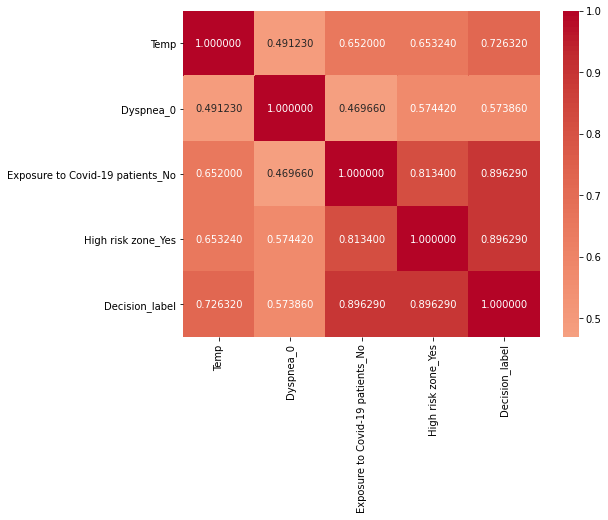

In [14]:
#Mapa de calor de las correlaciones

import seaborn as sns
import numpy as np
plt.figure(figsize=(8,6))
sns.heatmap(corre,xticklabels=corre.columns,yticklabels=corre.columns,center=0, cmap='coolwarm', annot=True, fmt='f')

In [15]:
x=DatasetPreprocesado['Exposure to Covid-19 patients_No']
y=dataF['Decision_label']

np.corrcoef(x,y)

array([[1.      , 0.911106],
       [0.911106, 1.      ]])

#	Realizar estadística descriptiva

In [16]:
type(DatasetPreprocesado)
DatasetPreprocesado = DatasetPreprocesado.iloc[1:]
DatasetPreprocesado.describe()


,Age,PO2,CRP,Temp,Gender_Female,Gender_Male,Gender_Undefined,Fever_,Fever_No,Fever_Yes,Dyspnea_0,Dyspnea_No,Dyspnea_Yes,Cough_0,Cough_No,Cough_Yes,Leukopenia_0,Leukopenia_Yes,Exposure to Covid-19 patients_0,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_Yes,High risk zone_0,High risk zone_Yes,Blood Test_0,Blood Test_Leukocytosis,Blood Test_Leukopenia,RT-PCR_0,RT-PCR_Positive,History_0,History_Asthma,History_COPD,History_Chronic,History_Croonic,History_DM,History_Kidney cancer,History_None
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,-0.008597,0.003548,0.001179,0.009055,0.445312,0.476562,0.078125,0.117188,0.234375,0.648438,0.734375,0.015625,0.250000,0.273438,0.195312,0.531250,0.968750,0.031250,0.359375,0.531250,0.007812,0.101562,0.468750,0.531250,0.984375,0.007812,0.007812,0.992188,0.007812,0.890625,0.007812,0.015625,0.007812,0.007812,0.007812,0.007812,0.054688
std,1.003065,1.007031,1.007754,1.002540,0.498953,0.501413,0.269423,0.322907,0.425272,0.479334,0.443401,0.124507,0.434714,0.447475,0.397999,0.500983,0.174676,0.174676,0.481703,0.500983,0.088388,0.303259,0.500983,0.500983,0.124507,0.088388,0.088388,0.088388,0.088388,0.313335,0.088388,0.124507,0.088388,0.088388,0.088388,0.088388,0.228263
min,-3.143630,-0.454122,-0.150910,-1.159054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.544158,-0.454122,-0.150910,-1.159054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092448,-0.454122,-0.150910,0.802956,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.689265,-0.454122,-0.150910,0.877598,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.630911,6.495809,8.642304,0.973566,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlacion de variables

In [17]:
Salida=dataF['Decision_label']
DataFrameCorrelacion=pd.concat([DatasetPreprocesado,Salida],axis=1)
DataFrameCorrelacion

,Age,PO2,CRP,Temp,Gender_Female,Gender_Male,Gender_Undefined,Fever_,Fever_No,Fever_Yes,Dyspnea_0,Dyspnea_No,Dyspnea_Yes,Cough_0,Cough_No,Cough_Yes,Leukopenia_0,Leukopenia_Yes,Exposure to Covid-19 patients_0,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_Yes,High risk zone_0,High risk zone_Yes,Blood Test_0,Blood Test_Leukocytosis,Blood Test_Leukopenia,RT-PCR_0,RT-PCR_Positive,History_0,History_Asthma,History_COPD,History_Chronic,History_Croonic,History_DM,History_Kidney cancer,History_None,Decision_label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0.145498,1.854588,0.135825,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.119754,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.756360,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.198549,-0.454122,-0.150910,-1.159054,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.198549,-0.454122,-0.150910,0.893592,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
126,0.198549,-0.454122,-0.150910,0.936245,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127,-1.021612,-0.454122,-0.150910,-1.159054,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
128,0.994305,-0.454122,-0.150910,0.797624,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
corre = DataFrameCorrelacion.corr()
corre=round(corre,5)
corre

,Age,PO2,CRP,Temp,Gender_Female,Gender_Male,Gender_Undefined,Fever_,Fever_No,Fever_Yes,Dyspnea_0,Dyspnea_No,Dyspnea_Yes,Cough_0,Cough_No,Cough_Yes,Leukopenia_0,Leukopenia_Yes,Exposure to Covid-19 patients_0,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_No,Exposure to Covid-19 patients_Yes,High risk zone_0,High risk zone_Yes,Blood Test_0,Blood Test_Leukocytosis,Blood Test_Leukopenia,RT-PCR_0,RT-PCR_Positive,History_0,History_Asthma,History_COPD,History_Chronic,History_Croonic,History_DM,History_Kidney cancer,History_None,Decision_label
Age,1.00000,0.13594,-0.16150,-0.00221,-0.02707,0.19450,-0.31185,0.01492,0.06379,-0.06665,0.00117,0.04619,-0.01442,0.04175,0.07912,-0.10015,0.12727,-0.12727,0.07333,-0.03698,0.01840,-0.06075,0.01703,-0.01703,0.00733,0.04195,-0.05228,0.05228,-0.05228,0.02570,-0.01930,-0.01067,0.04195,0.05609,0.02311,0.10792,-0.11068,0.01111
PO2,0.13594,1.00000,-0.01132,-0.14975,-0.04962,0.06682,-0.03246,0.10234,-0.04589,-0.02823,-0.26493,0.08451,0.24602,0.30485,-0.18036,-0.12900,0.08195,-0.08195,0.29469,-0.38989,-0.04049,0.18780,0.46232,-0.46232,0.05748,-0.04049,-0.04049,0.04049,-0.04049,-0.08065,0.10690,0.01725,-0.04049,0.16375,-0.04049,-0.04049,0.04353,-0.44072
CRP,-0.16150,-0.01132,1.00000,0.05534,-0.13575,-0.05074,0.34584,-0.05520,-0.08383,0.11156,-0.06383,-0.01909,0.07057,-0.09295,-0.07464,0.14232,0.02721,-0.02721,0.20229,-0.16130,-0.01344,-0.05094,0.16130,-0.16130,0.01909,-0.01344,-0.01344,0.01344,-0.01344,-0.08991,-0.01344,-0.01909,-0.01344,-0.01344,-0.01344,-0.01344,0.15986,-0.12424
Temp,-0.00221,-0.14975,0.05534,1.00000,0.28019,-0.19314,-0.15945,-0.33022,0.15865,0.08170,0.48402,-0.14737,-0.45148,-0.39409,0.25563,0.14892,0.21009,-0.21009,-0.47397,0.64867,-0.10380,-0.28848,-0.64992,0.64992,0.14737,-0.10380,-0.10380,0.10380,-0.10380,0.25850,-0.10380,-0.14737,-0.10380,-0.10380,-0.10380,-0.10380,-0.07350,0.72404
Gender_Female,-0.02707,-0.04962,-0.13575,0.28019,1.00000,-0.85494,-0.26084,-0.13096,0.28353,-0.16333,0.07619,0.01386,-0.08168,-0.12647,0.23264,-0.07186,0.07058,-0.07058,-0.34348,0.40064,-0.07951,-0.09310,-0.33764,0.33764,-0.01386,-0.07951,0.09904,-0.09904,0.09904,0.11253,0.09904,0.01386,-0.07951,-0.07951,-0.07951,0.09904,-0.14637,0.39995
Gender_Male,0.19450,0.06682,-0.05074,-0.19314,-0.85494,1.00000,-0.27777,0.09005,-0.19559,0.11287,-0.06364,0.00591,0.06322,0.08143,-0.15444,0.04996,-0.09833,0.09833,0.26335,-0.29485,-0.08467,0.09345,0.26350,-0.26350,-0.00591,0.09300,-0.08467,0.08467,-0.08467,-0.16680,-0.08467,0.00591,0.09300,0.09300,0.09300,-0.08467,0.18328,-0.26180
Gender_Undefined,-0.31185,-0.03246,0.34584,-0.15945,-0.26084,-0.27777,1.00000,0.07495,-0.16107,0.09241,-0.02266,-0.03668,0.03361,0.08266,-0.14342,0.04011,0.05229,-0.05229,0.14599,-0.19324,0.30482,-0.00151,0.13490,-0.13490,0.03668,-0.02583,-0.02583,0.02583,-0.02583,0.10202,-0.02583,-0.03668,-0.02583,-0.02583,-0.02583,-0.02583,-0.07002,-0.26551
Fever_,0.01492,0.10234,-0.05520,-0.33022,-0.13096,0.09005,0.07495,1.00000,-0.20158,-0.49481,-0.11085,0.14995,0.07012,0.21244,-0.11823,-0.09583,0.06544,-0.06544,0.23334,-0.38787,0.24355,0.19914,0.29052,-0.29052,-0.14995,-0.03233,0.24355,-0.24355,0.24355,-0.10579,-0.03233,0.14995,-0.03233,-0.03233,0.24355,-0.03233,0.01920,-0.35183
Fever_No,0.06379,-0.04589,-0.08383,0.15865,0.28353,-0.19559,-0.16107,-0.20158,1.00000,-0.75142,0.08221,-0.06971,-0.06389,-0.13254,0.37871,-0.18248,0.09937,-0.09937,-0.33753,0.40885,-0.04910,-0.12497,-0.29797,0.29797,0.06971,-0.04910,-0.04910,0.04910,-0.04910,0.07571,0.16038,-0.06971,-0.04910,-0.04910,-0.04910,-0.04910,-0.05196,0.35585
Fever_Yes,-0.06665,-0.02823,0.11156,0.08170,-0.16333,0.11287,0.09241,-0.49481,-0.75142,1.00000,0.00174,-0.03917,0.00945,-0.02553,-0.25635,0.22645,-0.13225,0.13225,0.14227,-0.10144,-0.12051,-0.02328,0.06865,-0.06865,0.03917,0.06534,-0.12051,0.12051,-0.12051,0.00410,-0.12051,-0.03917,0.06534,0.06534,-0.12051,0.06534,0.03317,-0.07861


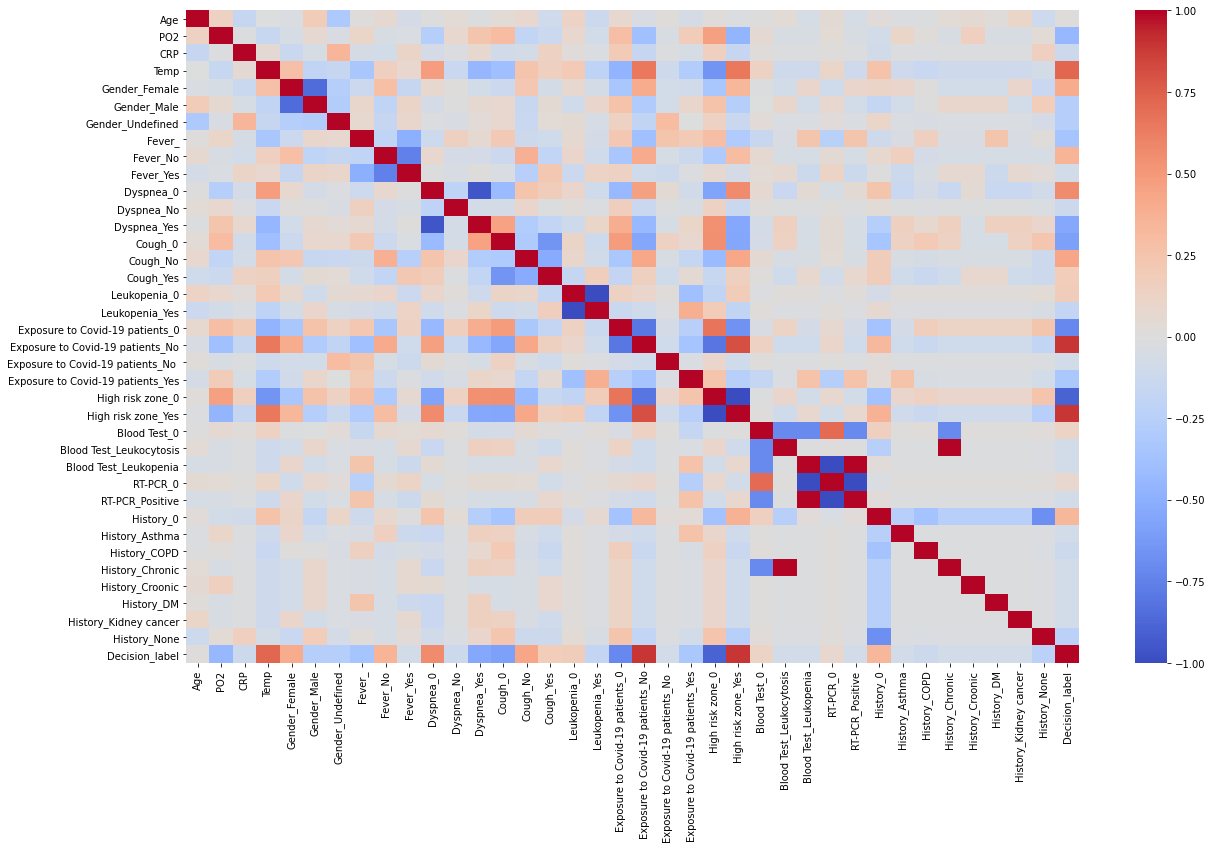

In [19]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(corre, cmap='coolwarm', annot=False, fmt='f')

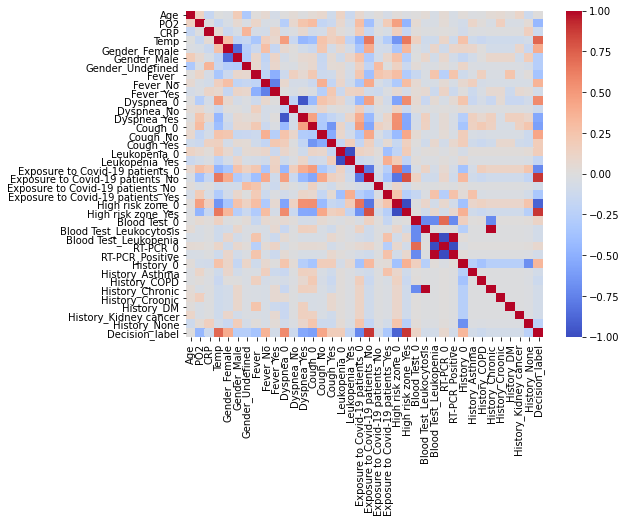

In [20]:
#Mapa de calor de las correlaciones

import seaborn as sns
import numpy as np
plt.figure(figsize=(8,6))
sns.heatmap(corre,xticklabels=corre.columns,yticklabels=corre.columns,center=0, cmap='coolwarm', annot=False, fmt='f')

In [21]:
# Seleccion de variables para realizar  la primera forma de procesar.

Xsubset = dataF[['Age','Gender','Fever','Dyspnea','Cough','PO2','CRP','Leukopenia','Exposure to Covid-19 patients','High risk zone','Temp'
,'Blood Test','RT-PCR','History']]

# Variable que se procesa como nuestra salida.

y = dataF.Decision_label.values
print(Xsubset)
type(Xsubset)

    Age  Gender Fever Dyspnea  ...  Temp Blood Test RT-PCR History
0    80    Male   Yes     Yes  ...     0          0      0       0
1    62    Male   Yes       0  ...     0          0      0       0
2    57    Male   Yes       0  ...     0          0      0       0
3    45    Male   Yes       0  ...     0          0      0       0
4    63    Male   Yes       0  ...     0          0      0       0
..   ..     ...   ...     ...  ...   ...        ...    ...     ...
125  62  Female    No       0  ...  38.3          0      0       0
126  63    Male   Yes       0  ...  38.5          0      0       0
127  63  Female   Yes       0  ...  39.3          0      0       0
128  40  Female    No       0  ...     0          0      0       0
129  78  Female    No       0  ...  36.7          0      0       0

[129 rows x 14 columns]


pandas.core.frame.DataFrame

In [22]:
#PRIMERA FORMA DE PREPROCESAR

preprocesador1 = make_column_transformer(
    (StandardScaler(),['Age','PO2','CRP','Temp']),
    (OneHotEncoder(),['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]))

#ordinal(importa el orden): OneHotEncoder -> sistema binario
#nominal(No importa el orden, importa la clase o el nombre): Encoder Simple 

X = preprocesador1.fit_transform(Xsubset)
print(X.shape[1])
print(X.shape)

#print(X)

#print(preprocesador1)
categorical_features = ['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]
cnamesDataset1 = ['Age','PO2','CRP','Temp']
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
#print(cnamesDataset2)

cnamesDataset1.extend(cnamesDataset2)
print(cnamesDataset1)

DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
print(DatasetPreprocesado.head())

DatasetPreprocesado.to_csv("DatasetPreprocesado2.csv", sep=";",index = False) #sep es el separado, por defector es ","

37
(129, 37)
['Age', 'PO2', 'CRP', 'Temp', 'Gender_Female', 'Gender_Male', 'Gender_Undefined', 'Fever_', 'Fever_No', 'Fever_Yes', 'Dyspnea_0', 'Dyspnea_No', 'Dyspnea_Yes', 'Cough_0', 'Cough_No', 'Cough_Yes', 'Leukopenia_0', 'Leukopenia_Yes', 'Exposure to Covid-19 patients_0', 'Exposure to Covid-19 patients_No', 'Exposure to Covid-19 patients_No ', 'Exposure to Covid-19 patients_Yes', 'High risk zone_0', 'High risk zone_Yes', 'Blood Test_0', 'Blood Test_Leukocytosis', 'Blood Test_Leukopenia', 'RT-PCR_0', 'RT-PCR_Positive', 'History_0', 'History_Asthma', 'History_COPD', 'History_Chronic', 'History_Croonic', 'History_DM', 'History_Kidney cancer', 'History_None']
        Age       PO2  ...  History_Kidney cancer  History_None
0  1.100406 -0.454122  ...                    0.0           0.0
1  0.145498  1.854588  ...                    0.0           0.0
2 -0.119754 -0.454122  ...                    0.0           0.0
3 -0.756360 -0.454122  ...                    0.0           0.0
4  0.198549 

In [23]:
# Normalizacion de los datos ya procesados.
# Estandarizacion de los datos en escala de mean = 0 y varianza = 1
import math
from scipy import sparse
from sklearn.preprocessing import StandardScaler

x = DatasetPreprocesado
x = StandardScaler().fit_transform(x)
print('Estandarizacion Realizada.')

Estandarizacion Realizada.


# Reduccion de Dimencionalidad(PCA)


In [24]:
# PCA sin espesificar la cantidad de componentes
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

principalDf=round(principalDf, 2)
print(principalDf)

       0     1     2     3     4     5   ...   31   32   33   34   35   36
0    3.37 -0.73 -0.42  0.08  0.05 -0.32  ...  0.0  0.0 -0.0 -0.0  0.0  0.0
1    1.83 -0.52  1.21  0.42 -1.35 -0.92  ...  0.0 -0.0  0.0 -0.0  0.0 -0.0
2    1.14  0.30  2.32  0.10 -0.03 -1.05  ...  0.0 -0.0  0.0 -0.0 -0.0  0.0
3    1.71  0.50  6.97 -0.10  4.59 -1.28  ...  0.0 -0.0 -0.0 -0.0 -0.0  0.0
4    1.73  0.47  6.85 -0.08  4.61 -1.61  ...  0.0  0.0 -0.0  0.0 -0.0 -0.0
..    ...   ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...
124 -2.93  0.09 -0.65 -0.49  0.56  0.24  ... -0.0 -0.0 -0.0  0.0 -0.0  0.0
125 -1.85 -0.31  1.11  1.31 -0.90 -0.87  ... -0.0  0.0 -0.0 -0.0 -0.0 -0.0
126 -2.49 -0.08  0.51  0.61 -0.30  0.82  ... -0.0  0.0 -0.0 -0.0  0.0 -0.0
127 -2.69  0.12 -1.70 -1.17  1.35  0.19  ... -0.0  0.0  0.0 -0.0 -0.0 -0.0
128 -3.21 -0.08 -2.03 -0.92  1.20 -0.43  ... -0.0 -0.0 -0.0  0.0  0.0  0.0

[129 rows x 37 columns]


In [25]:
print('Varianza Eplicada:')
explained_variance=pca.explained_variance_ratio_
explained_variance

Varianza Eplicada:


array([1.80147574e-01, 1.06202526e-01, 7.82906163e-02, 6.77181804e-02,
       6.09881797e-02, 5.06742323e-02, 4.59972748e-02, 4.28455625e-02,
       3.77925341e-02, 3.56164744e-02, 3.35860201e-02, 3.22778720e-02,
       2.86721884e-02, 2.66697779e-02, 2.54479294e-02, 2.38418650e-02,
       2.26974177e-02, 2.04124415e-02, 1.67828821e-02, 1.49309070e-02,
       1.34771099e-02, 1.11542570e-02, 1.05813047e-02, 6.77215469e-03,
       6.42271815e-03, 3.55278446e-32, 8.13786109e-33, 4.30271348e-33,
       4.03417950e-33, 2.00536654e-33, 8.92335153e-34, 8.92335153e-34,
       8.92335153e-34, 8.92335153e-34, 8.92335153e-34, 4.46742295e-34,
       3.84936036e-34])

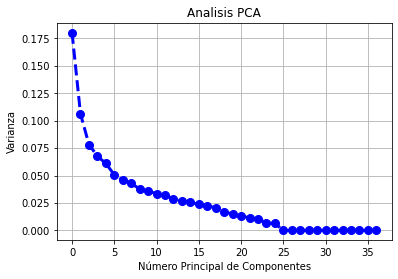

In [26]:
#Grafica de la varianza explicada sin espisificar la cantidad de componentes
explained_variance
import matplotlib.pyplot as plt
plt.plot(explained_variance, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8 )

plt.title('Analisis PCA')
plt.xlabel('Número Principal de Componentes')
plt.ylabel('Varianza')
plt.grid()
plt.show()

# PCA con 5 componentes principales


In [27]:
#PCA con una cantidad espesifica de N10 componentes principales
from sklearn.decomposition import PCA
num_components=5
pca = PCA(num_components)
principalComponents = pca.fit_transform(x)
a = range(num_components)
num_pc= a[::1]

principalDf7 = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf7=round(principalDf7, 2)
DF7FINAL=principalDf7
print(principalDf7)

        0     1     2     3     4
0    3.37 -0.73 -0.42  0.08  0.05
1    1.83 -0.52  1.21  0.42 -1.35
2    1.14  0.30  2.32  0.10 -0.03
3    1.71  0.50  6.97 -0.10  4.59
4    1.73  0.47  6.85 -0.08  4.61
..    ...   ...   ...   ...   ...
124 -2.93  0.09 -0.65 -0.49  0.56
125 -1.85 -0.31  1.11  1.31 -0.90
126 -2.49 -0.08  0.51  0.61 -0.30
127 -2.69  0.12 -1.70 -1.17  1.35
128 -3.21 -0.08 -2.03 -0.92  1.20

[129 rows x 5 columns]


In [28]:
#Varianza Explicada
explained_variance7=pca.explained_variance_ratio_
explained_variance7

array([0.18014757, 0.10620253, 0.07829062, 0.06771818, 0.06098818])

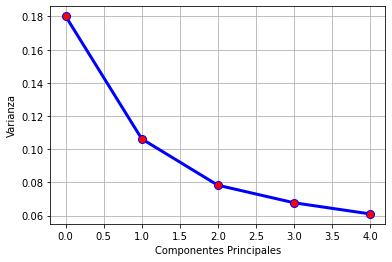

In [29]:
#explicacion de la varianza
#The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.
explained_variance7
a = range(num_components)
num_pc= a[::1]

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance7
         , color='blue', linestyle='solid', linewidth = 3, 
          marker='o', markerfacecolor='red', markersize=8)
#plt.ylim((0,0.4))
#plt.title('Analysis PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza')
plt.grid()

# PCA con 10 componentes principales

In [30]:
#PCA con una cantidad espesifica de N10 componentes principales
from sklearn.decomposition import PCA
num_components=10
pca = PCA(num_components)
principalComponents = pca.fit_transform(x)
a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf=round(principalDf, 2)
print(principalDf)

        0     1     2     3     4     5     6     7     8     9
0    3.37 -0.73 -0.42  0.08  0.05 -0.32  0.16 -1.60 -0.39 -0.62
1    1.83 -0.52  1.21  0.42 -1.35 -0.92  0.16 -1.09  0.05  0.92
2    1.14  0.30  2.32  0.10 -0.03 -1.05  0.38 -0.16 -0.49  1.16
3    1.71  0.50  6.97 -0.10  4.59 -1.28  0.24  1.77 -1.35 -0.76
4    1.73  0.47  6.85 -0.08  4.61 -1.61  0.26  1.44 -1.36 -0.78
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
124 -2.93  0.09 -0.65 -0.49  0.56  0.24 -0.19  0.38  1.13  0.52
125 -1.85 -0.31  1.11  1.31 -0.90 -0.87 -0.16 -0.26  0.07  0.14
126 -2.49 -0.08  0.51  0.61 -0.30  0.82 -0.63 -0.61  0.18 -0.21
127 -2.69  0.12 -1.70 -1.17  1.35  0.19  0.51  1.03 -0.01 -0.31
128 -3.21 -0.08 -2.03 -0.92  1.20 -0.43  0.31  0.29 -0.10 -0.15

[129 rows x 10 columns]


In [31]:
#Varianza Explicada
explained_variance10=pca.explained_variance_ratio_
explained_variance10

array([0.18014757, 0.10620253, 0.07829062, 0.06771818, 0.06098818,
       0.05067423, 0.04599727, 0.04284556, 0.03779253, 0.03561647])

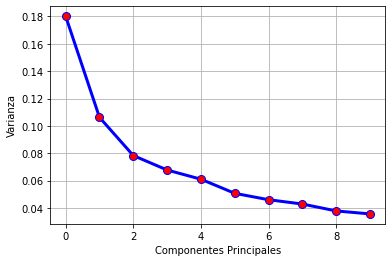

In [32]:
explained_variance10
a = range(num_components)
num_pc= a[::1]

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance10, color='blue', linestyle='solid', linewidth = 3, 
          marker='o', markerfacecolor='red', markersize=8)
#plt.ylim((0,0.4))
#plt.title('Analysis PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza')
plt.grid()

# Clustering con los 5 principales componentes del PCA. 

In [33]:
#Extracción de Datos
import pandas as pd
import numpy as np
import math
from scipy import sparse
from sklearn.preprocessing import StandardScaler
import math
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
x=principalDf7
x = StandardScaler().fit_transform(x)

In [34]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans
nclust = 4

#Kmeans Clustering 
def descubrirK(x, nclust):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = descubrirK(x, nclust)
kmeans = pd.DataFrame(clust_labels)

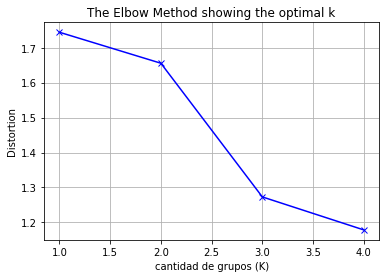

In [35]:
import matplotlib.pyplot as plt
distortions = []
X = x
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('cantidad de grupos (K)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

# Toma de tiempo en Segundos.

In [36]:
from time import time
import csv
#Datamining: Clustering (método no supervisado de Machine Learning)
#Sin Reducir Dimensionalidad: 
#Desventajas
#    a. Más costo computacional y mayor uso de memoria.
#    b. No se pueden visualizar fácilemnte los grupos de los usuarios por la alta dimensionalidad.

tiempo_inicial = time()
clust_labels, cent = descubrirK(principalDf7, nclust)
kmeans = pd.DataFrame(clust_labels)
principalDf7['salida'] = kmeans
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print (tiempo_ejecucion)

0.041699886322021484


In [37]:
# Proceso de Clustering con Kmeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from time import time

from sklearn.cluster import KMeans
def doKmeans(principalDf7, nclust=10):
    model = KMeans(nclust)
    model.fit(principalDf7)
    clust_labels = model.predict(principalDf7)
    cent = model.cluster_centers_
    return (clust_labels, cent)

start = time()
clust_labels, cent = doKmeans(x, k+1)
tiempo = time() - start
print('El tiempo de ejecicion es de:', tiempo, ' segundos.')

kmeans = pd.DataFrame(clust_labels)

El tiempo de ejecicion es de: 0.03854942321777344  segundos.


In [38]:
df5=pd.concat([principalDf7,dataF['Decision_label']],axis=1)

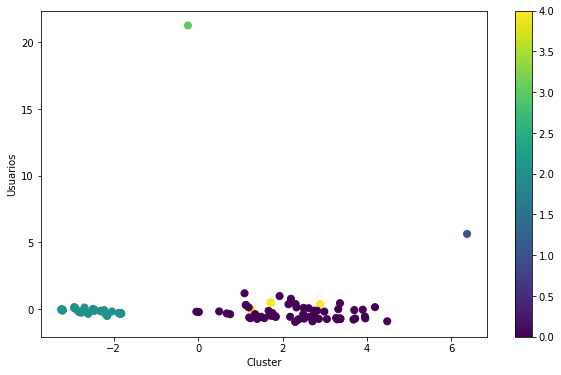

In [40]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf7[0],principalDf7[1],
                     c=kmeans[0],s=50)
#ax.set_title('Distribution User')
ax.set_xlabel('Cluster')
ax.set_ylabel('Usuarios')
plt.colorbar(scatter)

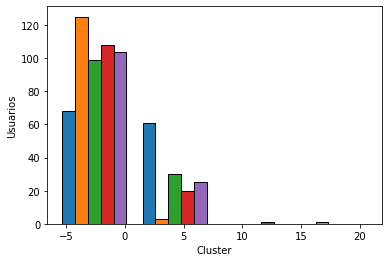

In [41]:
# %%
# Gráfico histograma
bins=[5,10,15,20,25,30,35,40,45,50]

# El rango se define con bins, debe ser menor que el número de muestras
plt.hist((principalDf7[0],principalDf7[1],principalDf7[2],principalDf7[3],principalDf7[4]),bins=4, edgecolor='black')

#plt.title('Distribution User')
plt.xlabel('Cluster')
plt.ylabel('Usuarios')
plt.show()

# Cluestering con todos los componentes del dataset

In [42]:
#Extracción de Datos
import pandas as pd
import numpy as np


import math
from scipy import sparse
from sklearn.preprocessing import StandardScaler
import math
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
x=DatasetPreprocesado
x = StandardScaler().fit_transform(x)

In [43]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans
nclust = 10

#Kmeans Clustering 
def descubrirK(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = descubrirK(x, nclust)
kmeans = pd.DataFrame(clust_labels)

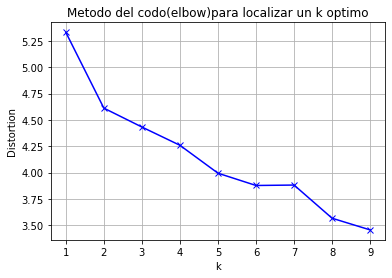

In [44]:
import matplotlib.pyplot as plt
distortions = []
X = x
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Metodo del codo(elbow)para localizar un k optimo')
plt.grid(True)
plt.show()

# Toma de tiempo en Segundos.

In [45]:
# Proceso de Clustering con Kmeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from time import time

from sklearn.cluster import KMeans
def doKmeans(X, nclust=10):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

start = time()
clust_labels, cent = doKmeans(x, k+1)
tiempo = time() - start
print('El tiempo de ejecicion es de:', tiempo, ' segundos.')

kmeans = pd.DataFrame(clust_labels)

El tiempo de ejecicion es de: 0.05323386192321777  segundos.


# Distribución de usuarios en los grupos

In [46]:
#Metodo Elbow
from scipy.spatial.distance import cdist
X=x
K_range=range(1,10,1)
distortions=[]

for i in K_range:
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0])

print('Kmeans terminado y Procesado') 

Kmeans terminado y Procesado


In [47]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

#Kmeans Clustering 
def doKmeans(X, nclust=2, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(x, 20, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full' )
#kmeans = pd.DataFrame(clust_labels)
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])
#kmeans
print('Usuarios agrupados y Procesados')

Usuarios agrupados y Procesados


In [48]:
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')
#UserGrupoK.sort_values(by='values', axis=1, ascending=False, inplace=False, kind='quicksort')
UserGrupoK

Grupos
9     20
14    19
19    17
7     15
2     11
1     10
8      7
18     7
17     7
5      4
16     2
0      2
15     1
10     1
6      1
11     1
4      1
3      1
12     1
13     1
Name: Grupos, dtype: int64

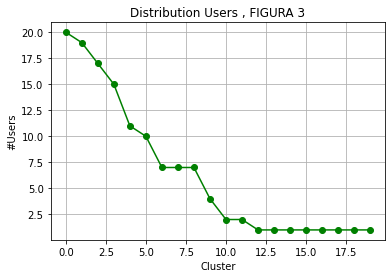

In [49]:
grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 10})
#plt.bar(range(len(grupo)), valores, color='red')
plt.plot(range(len(grupo)), valores, color='green', marker='o')
#plt.figure(figsize=(8,3))
##Pone el valor de los indices en el eje x
#plt.xticks(range(len(grupo)), grupo, rotation='vertical')
plt.title("Distribution Users , FIGURA 3")
plt.xlabel("Cluster")
plt.ylabel("#Users")
plt.grid(True)
plt.show()

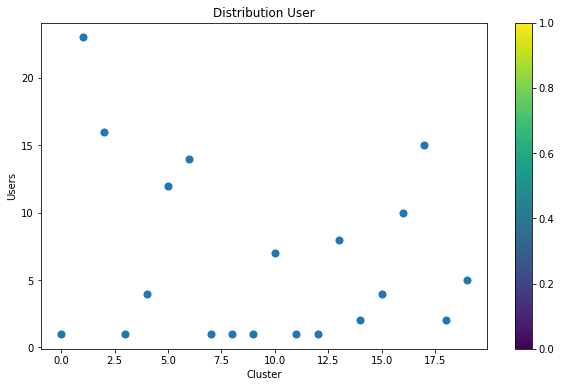

In [ ]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(grupo,valores,
                     s=50)
ax.set_title('Distribution User')
ax.set_xlabel('Cluster')
ax.set_ylabel('Users')
plt.colorbar(scatter)

# Realizar un Split con 20% en Test.
#Diseñar un modelo de Machine Learning: orientado a clasificación (random # forest) o a regresión (regresión multi variable)

In [50]:
# Seleccion de variables para realizar  la primera forma de procesar.

Xsubset = dataF[['Age','Gender','Fever','Dyspnea','Cough','PO2','CRP','Leukopenia','Exposure to Covid-19 patients','High risk zone','Temp'
,'Blood Test','RT-PCR','History']]

# Variable que se procesa como nuestra salida.

y = dataF.Decision_label.values
print(Xsubset)
type(Xsubset)

    Age  Gender Fever Dyspnea  ...  Temp Blood Test RT-PCR History
0    80    Male   Yes     Yes  ...     0          0      0       0
1    62    Male   Yes       0  ...     0          0      0       0
2    57    Male   Yes       0  ...     0          0      0       0
3    45    Male   Yes       0  ...     0          0      0       0
4    63    Male   Yes       0  ...     0          0      0       0
..   ..     ...   ...     ...  ...   ...        ...    ...     ...
125  62  Female    No       0  ...  38.3          0      0       0
126  63    Male   Yes       0  ...  38.5          0      0       0
127  63  Female   Yes       0  ...  39.3          0      0       0
128  40  Female    No       0  ...     0          0      0       0
129  78  Female    No       0  ...  36.7          0      0       0

[129 rows x 14 columns]


pandas.core.frame.DataFrame

In [51]:
#PRIMERA FORMA DE PREPROCESAR

preprocesador1 = make_column_transformer(
    (StandardScaler(),['Age','PO2','CRP','Temp']),
    (OneHotEncoder(),['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]))

#ordinal(importa el orden): OneHotEncoder -> sistema binario
#nominal(No importa el orden, importa la clase o el nombre): Encoder Simple 

X = preprocesador1.fit_transform(Xsubset)
print(X.shape[1])
print(X.shape)

#print(X)

#print(preprocesador1)
categorical_features = ['Gender','Fever','Dyspnea','Cough','Leukopenia','Exposure to Covid-19 patients','High risk zone','Blood Test','RT-PCR','History',]
cnamesDataset1 = ['Age','PO2','CRP','Temp']
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
#print(cnamesDataset2)

cnamesDataset1.extend(cnamesDataset2)
print(cnamesDataset1)

DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
print(DatasetPreprocesado.head())

DatasetPreprocesado.to_csv("DatasetPreprocesado2.csv", sep=";",index = False) #sep es el separado, por defector es ","

37
(129, 37)
['Age', 'PO2', 'CRP', 'Temp', 'Gender_Female', 'Gender_Male', 'Gender_Undefined', 'Fever_', 'Fever_No', 'Fever_Yes', 'Dyspnea_0', 'Dyspnea_No', 'Dyspnea_Yes', 'Cough_0', 'Cough_No', 'Cough_Yes', 'Leukopenia_0', 'Leukopenia_Yes', 'Exposure to Covid-19 patients_0', 'Exposure to Covid-19 patients_No', 'Exposure to Covid-19 patients_No ', 'Exposure to Covid-19 patients_Yes', 'High risk zone_0', 'High risk zone_Yes', 'Blood Test_0', 'Blood Test_Leukocytosis', 'Blood Test_Leukopenia', 'RT-PCR_0', 'RT-PCR_Positive', 'History_0', 'History_Asthma', 'History_COPD', 'History_Chronic', 'History_Croonic', 'History_DM', 'History_Kidney cancer', 'History_None']
        Age       PO2  ...  History_Kidney cancer  History_None
0  1.100406 -0.454122  ...                    0.0           0.0
1  0.145498  1.854588  ...                    0.0           0.0
2 -0.119754 -0.454122  ...                    0.0           0.0
3 -0.756360 -0.454122  ...                    0.0           0.0
4  0.198549 

In [52]:
# Splitting dataset en conjunto de training y conjunto de Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(X_test)

(103, 37)
(26, 37)
(103,)
(26,)


In [53]:
#TRANSFORMACION MEDIANTE ESTANDARIZACION DE DATOS
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
#print(X_train)
#print(X_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

y_label = preprocessing.LabelEncoder()
y_label = y_label.fit_transform(y_train)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_label)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1])

In [55]:
#EVALUACION
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[16  0]
 [ 0 10]]
accuracy: 1.0
